## K-Means for Chicago Food Inspections

In [81]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


import pandas as pd

from sklearn import preprocessing
import sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans

In [82]:
# Loading drivers dataset
dataset_df = pd.read_csv("data/Chicago_Food_Inspections.csv")

In [83]:
dataset_df.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2072076,MODERN WING/TERZO PIANO,MODERN WING/TERZO PIANO,1954252.0,Restaurant,Risk 1 (High),159 E MONROE DR,CHICAGO,IL,60604.0,8/8/2017,Canvass Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.880740,-87.62270,"(41.88073951830644, -87.62270010046835)"
1,2072061,PATEL'S CAFE,PATEL'S CAFE,2036995.0,Restaurant,Risk 1 (High),2600 W DEVON AVE,CHICAGO,IL,60659.0,8/8/2017,Complaint Re-Inspection,Pass,13. NO EVIDENCE OF RODENT OR INSECT INFESTATIO...,41.997755,-87.69483,"(41.99775478924851, -87.69482972221137)"


In [84]:
dataset_df.tail(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
26812,1609261,TORTORICE'S PIZZA,TORTORICE'S PIZZA,2442943.0,Restaurant,Risk 1 (High),2101-2103 W IRVIING PARK RD,CHICAGO,IL,60618.0,1/4/2016,License,Not Ready,NaN,41.954010,-87.681241,"(41.95401015404328, -87.68124094099036)"
26813,1609260,VANILLE PATTISSERIE,VANILLE,2442830.0,Restaurant,Risk 2 (Medium),3243 N BROADWAY,CHICAGO,IL,60657.0,1/4/2016,License,Not Ready,NaN,41.941294,-87.644292,"(41.94129418083914, -87.64429200618663)"


In [85]:
dataset_df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

## Clean the dirty/messy data

You need to write your python code such that:
1. rows/records/tuples/transactions in the data frame that have missing values for fields/columns will be removed
2. rows/records/tuples/transactions in the data frame that have invalid/abnormal values for fields/columns will be removed
3. Duplicate/redundant values removed and/or replaced
    Example 1:
            CHILDERN'S SERVICE FACILITY
            CHILDRENS SERVICES FACILITY
    Example 2:
            1023 CHILDERN'S SERVICES FACILITY
            1023-CHILDREN'S SERVICES FACILITY
        
        
Examples of invalid/dirty/messy data:
  1. NaN values in the dataframe (Blank/Empty cells in the CSV file)

  2. Every inspection must have an Inspection ID
    
  3. Every inspection must have an Address


In [86]:
# The easiest way (though is not the perfect/desired one) to clean your data is to drop the NaN

dataset_df = dataset_df.dropna(axis=0, how='any')



In [87]:
dataset_df['Zip'] = dataset_df['Zip'].astype(int)

In [88]:
dataset_df.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2072076,MODERN WING/TERZO PIANO,MODERN WING/TERZO PIANO,1954252.0,Restaurant,Risk 1 (High),159 E MONROE DR,CHICAGO,IL,60604,8/8/2017,Canvass Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.880740,-87.622700,"(41.88073951830644, -87.62270010046835)"
1,2072061,PATEL'S CAFE,PATEL'S CAFE,2036995.0,Restaurant,Risk 1 (High),2600 W DEVON AVE,CHICAGO,IL,60659,8/8/2017,Complaint Re-Inspection,Pass,13. NO EVIDENCE OF RODENT OR INSECT INFESTATIO...,41.997755,-87.694830,"(41.99775478924851, -87.69482972221137)"
2,2072060,KRUNGTHEP THAI CUISINE,KRUNGTHEP THAI CUISINE,2340786.0,Restaurant,Risk 1 (High),3205 N HALSTED ST,CHICAGO,IL,60657,8/8/2017,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.940146,-87.649124,"(41.940146235765575, -87.64912448509257)"
3,2072037,LAKE SHORE SCHOOLS,LAKE SHORE SCHOOLS,2245322.0,Daycare Above and Under 2 Years,Risk 1 (High),5611-5621 N CLARK ST,CHICAGO,IL,60660,8/8/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.983864,-87.668689,"(41.98386367207857, -87.66868894217718)"
4,2072035,"THE CATCADE, INC.",THE CATCADE,2542576.0,Animal Shelter Cafe Permit,Risk 3 (Low),1235 W BELMONT AVE,CHICAGO,IL,60657,8/8/2017,License,Pass,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.939703,-87.660363,"(41.939702878083544, -87.6603632122827)"


In [89]:
from sklearn.preprocessing import LabelEncoder

list_of_feaatures_to_encode = ['Risk', 'Results']
le = LabelEncoder()

for i in list_of_feaatures_to_encode:
    enc = le.fit(np.unique(dataset_df[i].values))
    print(enc.classes_)
    dataset_df[i] = le.fit_transform(dataset_df[i])




['Risk 1 (High)' 'Risk 2 (Medium)' 'Risk 3 (Low)']
['Fail' 'No Entry' 'Not Ready' 'Out of Business' 'Pass'
 'Pass w/ Conditions']


In [90]:

### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` , f2, and `f3` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.

# f1 = dataset_df['Facility Type'].values
f0 = dataset_df['Risk'].values
f1 = dataset_df['Results'].values
f2 = dataset_df['Zip'].values

X=np.matrix(zip(f0,f1, f2))
kmeans = KMeans(n_clusters=2).fit(X)

In [91]:
X[:5]

matrix([[    0,     4, 60604],
        [    0,     4, 60659],
        [    0,     4, 60657],
        [    0,     4, 60660],
        [    2,     4, 60657]])

In [92]:
kmeans.labels_

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [93]:
kmeans = KMeans(2, random_state=0).fit_predict(X)


In [94]:
kmeans.shape

(20207,)

In [95]:
kmeans

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

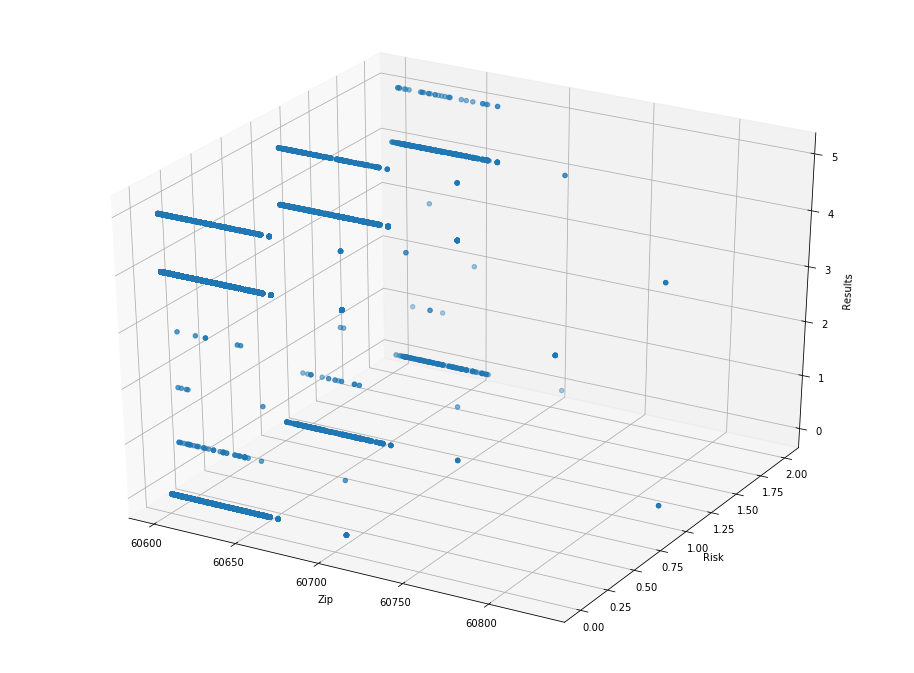

In [96]:
# First plot the raw data with no clustering 

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')



x_ax = np.array(X[:, 2]).flatten()
y_ax = np.array(X[:, 0]).flatten()
z_ax = np.array(X[:, 1]).flatten()
    

ax.scatter(x_ax, y_ax, z_ax, marker='o')


ax.set_xlabel('Zip')
ax.set_ylabel('Risk')
ax.set_zlabel('Results')



plt.show()

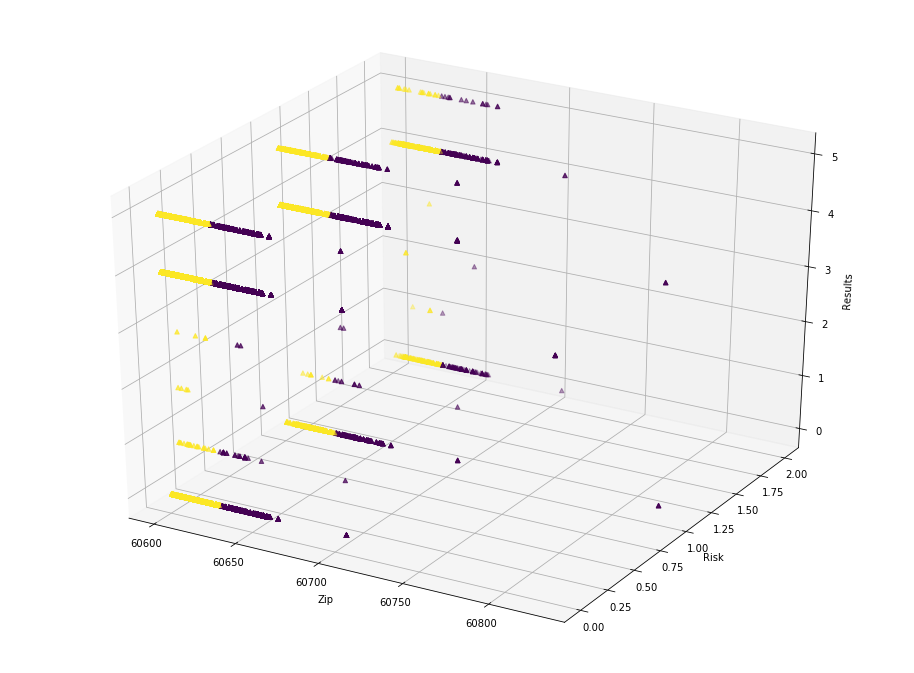

In [97]:
# Now plot the data in two clusters of K-Means
# No Scaling on the  data yet


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')


kmeans = KMeans(2, random_state=0).fit_predict(X)


x_ax = np.array(X[:, 2]).flatten()
y_ax = np.array(X[:, 0]).flatten()
z_ax = np.array(X[:, 1]).flatten()
    

ax.scatter(x_ax, y_ax, z_ax, c=kmeans, marker='^')


ax.set_xlabel('Zip')
ax.set_ylabel('Risk')
ax.set_zlabel('Results')



plt.show()

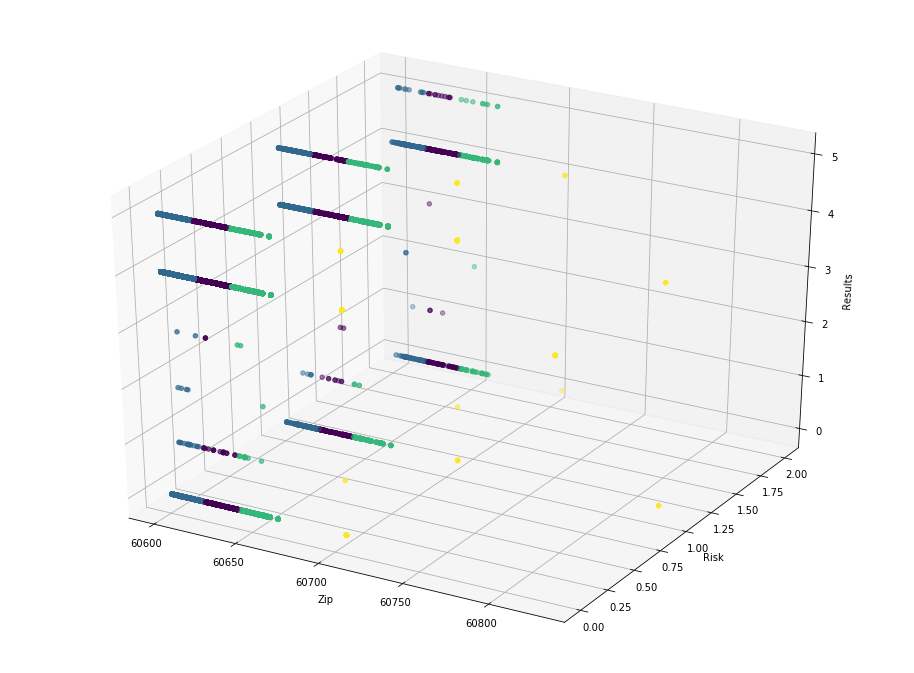

In [98]:
# No scaling on the data yet 
# 4 clusters of K-Means

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

kmeans = KMeans(4, random_state=0).fit_predict(X)


x_ax = np.array(X[:, 2]).flatten()
y_ax = np.array(X[:, 0]).flatten()
z_ax = np.array(X[:, 1]).flatten()
    

ax.scatter(x_ax, y_ax, z_ax, c=kmeans, marker='o')

ax.set_xlabel('Zip')
ax.set_ylabel('Risk')
ax.set_zlabel('Results')


plt.show()

In [99]:
# An example to illustrate scaling

XX = np.array([[1,2,100],[4,3,50],[1,1,75],[2,1,95]])
 
print XX



[[  1   2 100]
 [  4   3  50]
 [  1   1  75]
 [  2   1  95]]


In [100]:
X_scaled = preprocessing.scale(XX)

X_scaled                                  


array([[-0.81649658,  0.30151134,  1.01600102],
       [ 1.63299316,  1.50755672, -1.52400152],
       [-0.81649658, -0.90453403, -0.25400025],
       [ 0.        , -0.90453403,  0.76200076]])

In [101]:
X.shape

(20207, 3)

In [102]:
# ZIP code Feature is big compared to toher features(Risk and Results)
# We need to Scale the data
print X

[[    0     4 60604]
 [    0     4 60659]
 [    0     4 60657]
 ..., 
 [    1     0 60608]
 [    0     4 60638]
 [    0     4 60604]]


In [103]:
# Scale the data

X_scaled = preprocessing.scale(X)

X_scaled                                  


array([[-0.51859553,  0.38659078, -1.26961213],
       [-0.51859553,  0.38659078,  1.56102613],
       [-0.51859553,  0.38659078,  1.45809382],
       ..., 
       [ 1.33811245, -2.05156148, -1.06374753],
       [-0.51859553,  0.38659078,  0.48023697],
       [-0.51859553,  0.38659078, -1.26961213]])

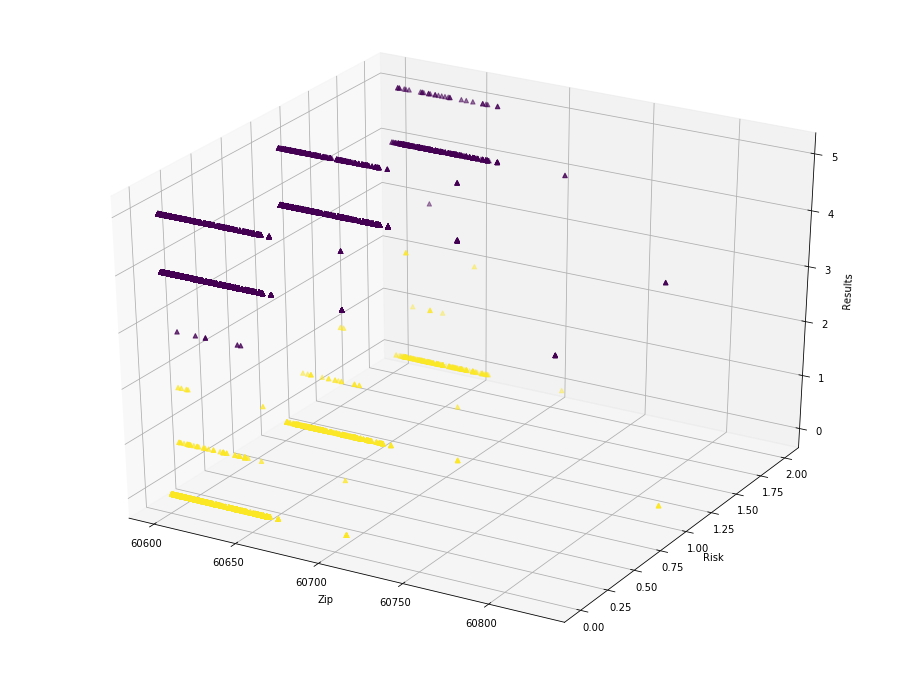

In [104]:
# After Scaling the values 
# 2 clusters using K-Means


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

kmeans = KMeans(2, random_state=0).fit_predict(X_scaled)


x_ax = np.array(X[:, 2]).flatten()
y_ax = np.array(X[:, 0]).flatten()
z_ax = np.array(X[:, 1]).flatten()
    

ax.scatter(x_ax, y_ax, z_ax, c=kmeans, marker='^')

ax.set_xlabel('Zip')
ax.set_ylabel('Risk')
ax.set_zlabel('Results')


plt.show()

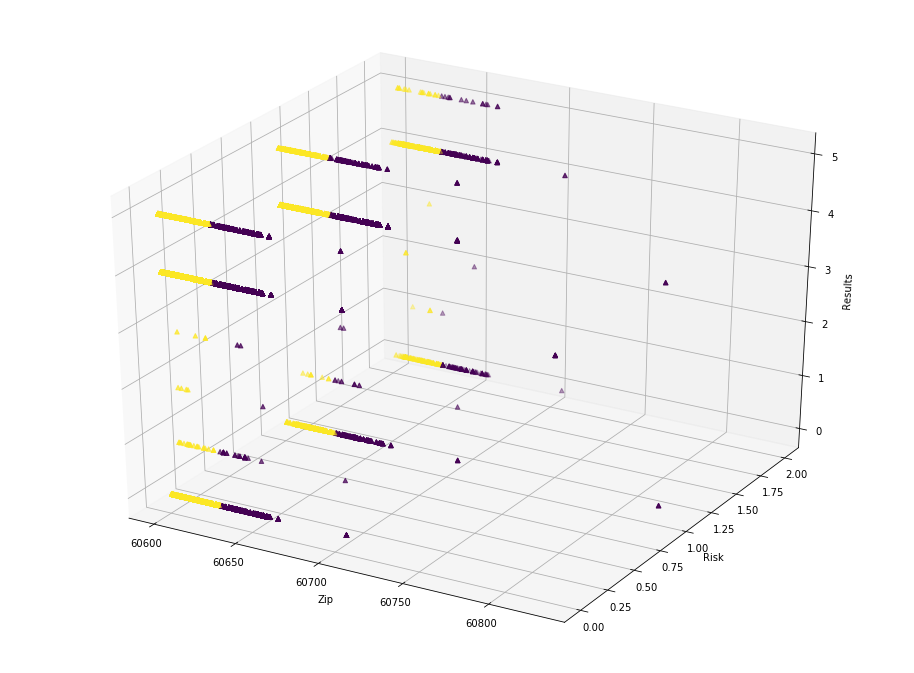

In [105]:
# No scaling 
# 2 Clusters of K-Means


fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

kmeans = KMeans(2, random_state=0).fit_predict(X)


x_ax = np.array(X[:, 2]).flatten()
y_ax = np.array(X[:, 0]).flatten()
z_ax = np.array(X[:, 1]).flatten()
    

ax.scatter(x_ax, y_ax, z_ax, c=kmeans, marker='^')

ax.set_xlabel('Zip')
ax.set_ylabel('Risk')
ax.set_zlabel('Results')

plt.show()


## Requirement #1: Inspect the given dataset and remove any dirty/messy records

In [106]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [107]:
# Next, we load the required dataset we intend analyzing,
# reading it in as a Pandas DataFrame.
my_data = pd.read_csv("data/Chicago_Food_Inspections.csv")

In [108]:
# We observe the first 7 rows of the data
my_data.head(7)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2072076,MODERN WING/TERZO PIANO,MODERN WING/TERZO PIANO,1954252.0,Restaurant,Risk 1 (High),159 E MONROE DR,CHICAGO,IL,60604.0,8/8/2017,Canvass Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.880740,-87.622700,"(41.88073951830644, -87.62270010046835)"
1,2072061,PATEL'S CAFE,PATEL'S CAFE,2036995.0,Restaurant,Risk 1 (High),2600 W DEVON AVE,CHICAGO,IL,60659.0,8/8/2017,Complaint Re-Inspection,Pass,13. NO EVIDENCE OF RODENT OR INSECT INFESTATIO...,41.997755,-87.694830,"(41.99775478924851, -87.69482972221137)"
2,2072060,KRUNGTHEP THAI CUISINE,KRUNGTHEP THAI CUISINE,2340786.0,Restaurant,Risk 1 (High),3205 N HALSTED ST,CHICAGO,IL,60657.0,8/8/2017,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.940146,-87.649124,"(41.940146235765575, -87.64912448509257)"
3,2072037,LAKE SHORE SCHOOLS,LAKE SHORE SCHOOLS,2245322.0,Daycare Above and Under 2 Years,Risk 1 (High),5611-5621 N CLARK ST,CHICAGO,IL,60660.0,8/8/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.983864,-87.668689,"(41.98386367207857, -87.66868894217718)"
4,2072035,"THE CATCADE, INC.",THE CATCADE,2542576.0,Animal Shelter Cafe Permit,Risk 3 (Low),1235 W BELMONT AVE,CHICAGO,IL,60657.0,8/8/2017,License,Pass,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.939703,-87.660363,"(41.939702878083544, -87.6603632122827)"
5,2072017,KAMEYA RAMEN,KAMEYA RAMEN,2548954.0,Restaurant,Risk 1 (High),604 W BELMONT AVE,CHICAGO,IL,60657.0,8/8/2017,License,Pass,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.940149,-87.644663,"(41.94014913764849, -87.6446627167078)"
6,2071998,PIZZA MANIA,PIZZA MANIA,33059.0,NaN,Risk 3 (Low),5777 N RIDGE AVE,CHICAGO,IL,60660.0,8/7/2017,Canvass,Out of Business,NaN,41.987061,-87.665448,"(41.98706118346717, -87.66544832642707)"


In [109]:
# We observe the last 6 rows of the data
my_data.tail(6)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
26808,1501540,ROYAL DELI,ROYAL DELI,2115060.0,Grocery Store,Risk 2 (Medium),2001-2003 S DAMEN AVE,CHICAGO,IL,60608.0,11/6/2014,Canvass,Fail,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.854911,-87.675773,"(41.85491131910428, -87.67577256587357)"
26809,1609266,LITTLE LEARNERS DAYCARE,LITTLE LEARNERS DAYCARE,2215555.0,Daycare (2 - 6 Years),Risk 1 (High),6255 S MAYFIELD AVE,CHICAGO,IL,60638.0,1/5/2016,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.778118,-87.768912,"(41.778117574741486, -87.76891206328479)"
26810,1609264,Subway,Subway,2054100.0,Restaurant,Risk 1 (High),236 S State ST,CHICAGO,IL,60604.0,1/5/2016,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.878565,-87.627835,"(41.87856527075272, -87.62783522302401)"
26811,1609263,BP,BP,2232520.0,Grocery Store,Risk 3 (Low),3801-3815 W ROOSEVELT RD,CHICAGO,IL,60624.0,1/5/2016,Canvass,Out of Business,NaN,41.866129,-87.720190,"(41.86612908906597, -87.72019027868306)"
26812,1609261,TORTORICE'S PIZZA,TORTORICE'S PIZZA,2442943.0,Restaurant,Risk 1 (High),2101-2103 W IRVIING PARK RD,CHICAGO,IL,60618.0,1/4/2016,License,Not Ready,NaN,41.954010,-87.681241,"(41.95401015404328, -87.68124094099036)"
26813,1609260,VANILLE PATTISSERIE,VANILLE,2442830.0,Restaurant,Risk 2 (Medium),3243 N BROADWAY,CHICAGO,IL,60657.0,1/4/2016,License,Not Ready,NaN,41.941294,-87.644292,"(41.94129418083914, -87.64429200618663)"


In [110]:
# We note the shape of the data
my_data.shape

(26814, 17)

In [111]:
# As well as the datatypes of each column
my_data.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [112]:
# To correct these errors, we first drop entirely rows that 
# have one or more missing values
my_data = my_data.dropna(axis=0, how='any')

In [113]:
# Note the new structure of the data
my_data.shape

(20207, 17)

In [114]:
dropped_cols = 26814 - 20207
print('This implies that dropping of the rows with missing values resulted in {} dropped-rows'.format(dropped_cols))


This implies that dropping of the rows with missing values resulted in 6607 dropped-rows


In [115]:
my_data.tail(4)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
26807,1609265,CRATER FOOD & LIQUOR,CRATER FOOD & LIQUOR,46477.0,Grocery Store,Risk 3 (Low),1144 N MILWAUKEE AVE,CHICAGO,IL,60642.0,1/5/2016,Canvass Re-Inspection,Pass,29. PREVIOUS MINOR VIOLATION(S) CORRECTED 7-42...,41.902429,-87.665254,"(41.90242867361201, -87.66525448664798)"
26808,1501540,ROYAL DELI,ROYAL DELI,2115060.0,Grocery Store,Risk 2 (Medium),2001-2003 S DAMEN AVE,CHICAGO,IL,60608.0,11/6/2014,Canvass,Fail,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.854911,-87.675773,"(41.85491131910428, -87.67577256587357)"
26809,1609266,LITTLE LEARNERS DAYCARE,LITTLE LEARNERS DAYCARE,2215555.0,Daycare (2 - 6 Years),Risk 1 (High),6255 S MAYFIELD AVE,CHICAGO,IL,60638.0,1/5/2016,License,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.778118,-87.768912,"(41.778117574741486, -87.76891206328479)"
26810,1609264,Subway,Subway,2054100.0,Restaurant,Risk 1 (High),236 S State ST,CHICAGO,IL,60604.0,1/5/2016,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.878565,-87.627835,"(41.87856527075272, -87.62783522302401)"


In [116]:
# Next, we correct the datatypes of the 'License #' and 'Zip' columns
my_data['License #'] = my_data['License #'].astype(int)
my_data['Zip'] = my_data['Zip'].astype(int)

In [117]:
# We check to ensure the corrections have indeed been effected
my_data.head(4)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2072076,MODERN WING/TERZO PIANO,MODERN WING/TERZO PIANO,1954252,Restaurant,Risk 1 (High),159 E MONROE DR,CHICAGO,IL,60604,8/8/2017,Canvass Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.880740,-87.622700,"(41.88073951830644, -87.62270010046835)"
1,2072061,PATEL'S CAFE,PATEL'S CAFE,2036995,Restaurant,Risk 1 (High),2600 W DEVON AVE,CHICAGO,IL,60659,8/8/2017,Complaint Re-Inspection,Pass,13. NO EVIDENCE OF RODENT OR INSECT INFESTATIO...,41.997755,-87.694830,"(41.99775478924851, -87.69482972221137)"
2,2072060,KRUNGTHEP THAI CUISINE,KRUNGTHEP THAI CUISINE,2340786,Restaurant,Risk 1 (High),3205 N HALSTED ST,CHICAGO,IL,60657,8/8/2017,Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.940146,-87.649124,"(41.940146235765575, -87.64912448509257)"
3,2072037,LAKE SHORE SCHOOLS,LAKE SHORE SCHOOLS,2245322,Daycare Above and Under 2 Years,Risk 1 (High),5611-5621 N CLARK ST,CHICAGO,IL,60660,8/8/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.983864,-87.668689,"(41.98386367207857, -87.66868894217718)"


## Requirement #2: Perform any preprocessing/ scaling needed to the dataset features

In [118]:
# Give that the KMeans algorithm only works on numeric data,
# we need to encode these columns as such. Using the LabelEncoder module.
from sklearn.preprocessing import LabelEncoder

encoded_columns = ['Risk', 'Results']
encoder = LabelEncoder()

for n in encoded_columns:
    cnd = encoder.fit(np.unique(my_data[n].values))
    print(cnd.classes_)
    my_data[n] = encoder.fit_transform(my_data[n])

['Risk 1 (High)' 'Risk 2 (Medium)' 'Risk 3 (Low)']
['Fail' 'No Entry' 'Not Ready' 'Out of Business' 'Pass'
 'Pass w/ Conditions']


In [119]:
# We observe what our data with encoded 'Risk' and 'Results' columns looks like
my_data.head(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2072076,MODERN WING/TERZO PIANO,MODERN WING/TERZO PIANO,1954252,Restaurant,0,159 E MONROE DR,CHICAGO,IL,60604,8/8/2017,Canvass Re-Inspection,4,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.880740,-87.622700,"(41.88073951830644, -87.62270010046835)"
1,2072061,PATEL'S CAFE,PATEL'S CAFE,2036995,Restaurant,0,2600 W DEVON AVE,CHICAGO,IL,60659,8/8/2017,Complaint Re-Inspection,4,13. NO EVIDENCE OF RODENT OR INSECT INFESTATIO...,41.997755,-87.694830,"(41.99775478924851, -87.69482972221137)"
2,2072060,KRUNGTHEP THAI CUISINE,KRUNGTHEP THAI CUISINE,2340786,Restaurant,0,3205 N HALSTED ST,CHICAGO,IL,60657,8/8/2017,Complaint,4,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.940146,-87.649124,"(41.940146235765575, -87.64912448509257)"


In [120]:
# We keep all the features in a 
# three-dimensional matrix for easier computation
f0 = my_data['Risk'].values
f1 = my_data['Results'].values
f2 = my_data['Zip'].values

my_data_matrix = np.matrix(zip(f0,f1, f2))

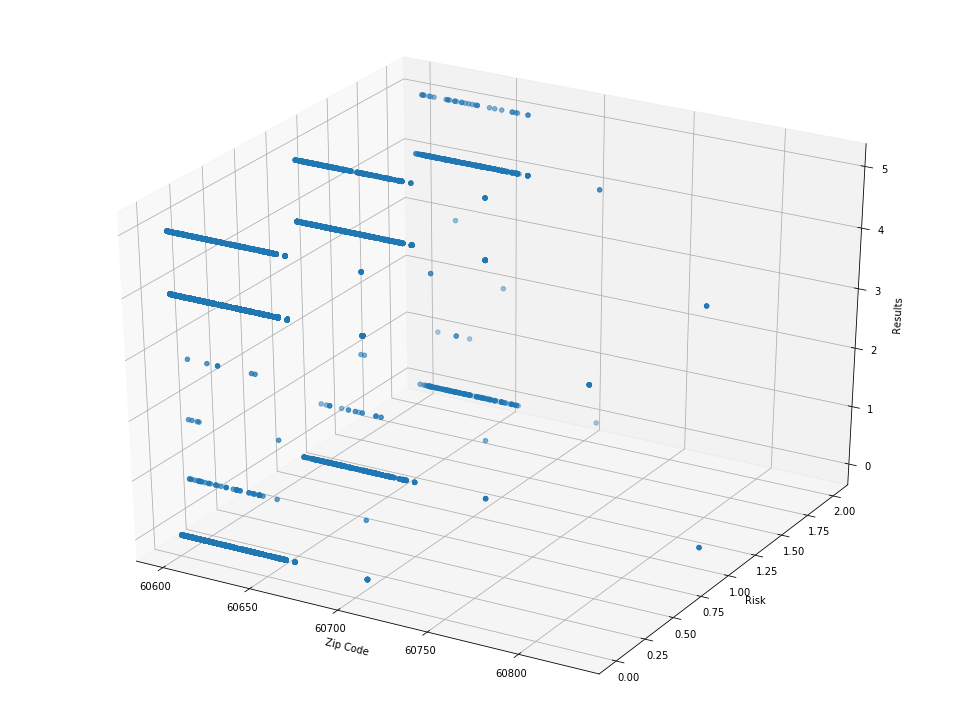

In [121]:
# This is evident when we visualize the data in a 3D scatter plot:
graphplot1 = plt.figure(figsize=(17, 13))
display = graphplot1.add_subplot(111, projection='3d')

x_axis = np.array(my_data_matrix[:, 2]).flatten()
y_axis = np.array(my_data_matrix[:, 0]).flatten()
z_axis = np.array(my_data_matrix[:, 1]).flatten()
    
display.scatter(x_axis, y_axis, z_axis, marker='o')
display.set_xlabel('Zip Code')
display.set_ylabel('Risk')
display.set_zlabel('Results')

plt.show()

In [122]:
# To show the numerical difference between the scaled and non-scaled
# versions of the data, note that the non-scaled data has non-unit 
# standard deviation
my_data_matrix.std(axis=0)


matrix([[  0.53858766,   1.64058664,  19.4302468 ]])

In [123]:
# We perform the scaling operation
my_data_scaled = preprocessing.scale(my_data_matrix)

In [124]:
# We note the scaled data has a unit standard deviation
my_data_scaled.std(axis=0)

array([ 1.,  1.,  1.])

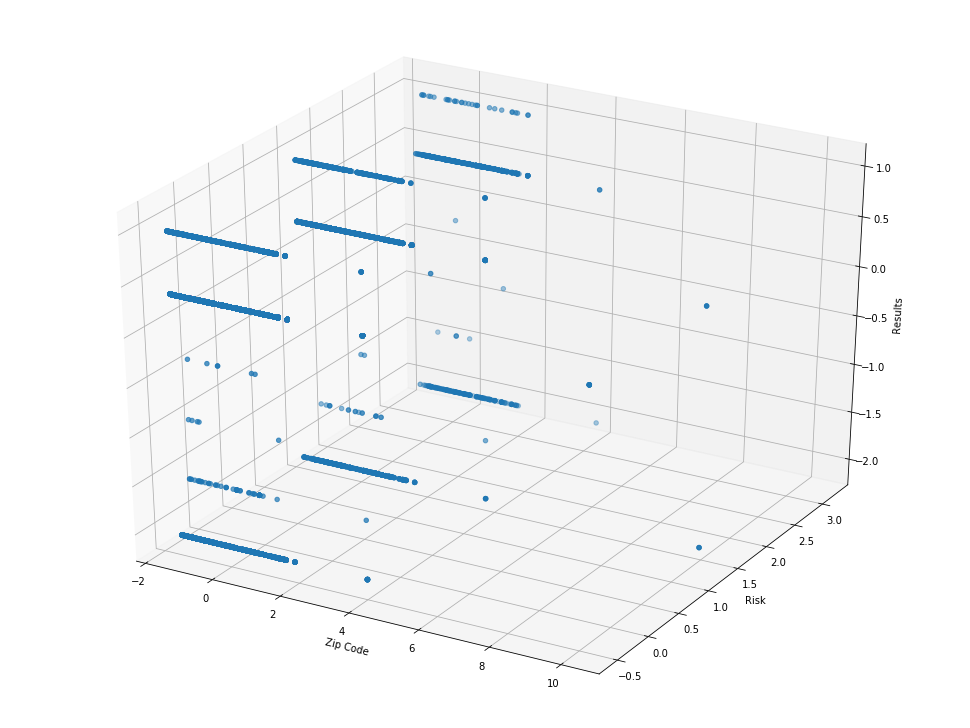

In [125]:
# And when visualized, the scaled data looks like this:
graphplot2 = plt.figure(figsize=(17, 13))
display = graphplot2.add_subplot(111, projection='3d')


x_axis = np.array(my_data_scaled[:, 2]).flatten()
y_axis = np.array(my_data_scaled[:, 0]).flatten()
z_axis = np.array(my_data_scaled[:, 1]).flatten()
    

display.scatter(x_axis, y_axis, z_axis, marker='o')

display.set_xlabel('Zip Code')
display.set_ylabel('Risk')
display.set_zlabel('Results')


plt.show()

## Requirement #3: Use K-MEANS algorithm to cluster the data into two clusters with respect to the following Features: Zip code, Results, Risk

In [126]:
# This is done by first fitting or training the model using the
# scaled data, and then making a cluster prediction.
k_means_data = KMeans(2, random_state=0).fit_predict(my_data_scaled)

## Requirement #4: Create a 3D scatter diagram to plot the clusters/results of Requirement #3 for  the Zip code, Results, and Risk Features

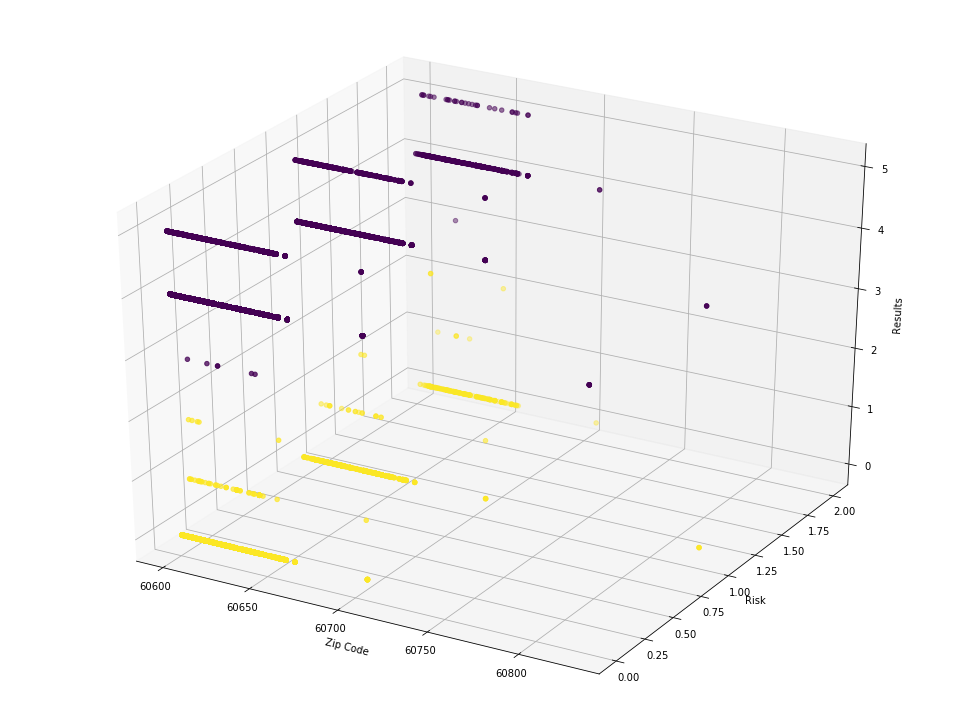

In [127]:
# We then visualize the created clusters of the data
graphplot3 = plt.figure(figsize=(17, 13))
display = graphplot3.add_subplot(111, projection='3d')

x_axis = np.array(my_data_matrix[:, 2]).flatten()
y_axis = np.array(my_data_matrix[:, 0]).flatten()
z_axis = np.array(my_data_matrix[:, 1]).flatten()
    
display.scatter(x_axis, y_axis, z_axis, c=k_means_data, marker='o')
display.set_xlabel('Zip Code')
display.set_ylabel('Risk')
display.set_zlabel('Results')

plt.show()

## Requirement #5: List the top 5 Zip Codes that got the maximum number of Inspections with High Risk and Failed Result

In [128]:
# To compute this, first the observations which have 'High' Risk and 'Fail' result 
# are filtered out and stored in a new DataFrame
data_highrisk_failedresult = my_data[(my_data['Risk'] == 0) & (my_data['Results'] == 0)]

# This new data subset now contains only observations with 'High' Risk and 'Fail' result
data_rows, data_cols = data_highrisk_failedresult.shape

In [129]:
print('There are {} observations with High Risk and Failed Result'.format(data_rows))

There are 2752 observations with High Risk and Failed Result


In [130]:
# We examine the first 4 observations of this new sub-dataset to see it's contents
data_highrisk_failedresult.head(4)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
17,2071955,COMMUNITY LEARNING CENTER INC,COMMUNITY LEARNING CENTER INC,2215745,Daycare (2 - 6 Years),0,10620 S WENTWORTH AVE,CHICAGO,IL,60628,8/4/2017,License,0,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.700904,-87.628261,"(41.70090420563105, -87.62826085273718)"
20,2071941,NICKY'S CHINESE FOOD,NICKY'S CHINESE FOOD,1299747,Restaurant,0,5231 S WOODLAWN AVE,CHICAGO,IL,60615,8/4/2017,Complaint,0,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.799952,-87.596506,"(41.79995222840709, -87.59650591702139)"
22,2071934,"COMMUNITY LEARNING CENTER, INC","COMMUNITY LEARNING CENTER, INC",2215746,Daycare (2 - 6 Years),0,10612 S WENTWORTH AVE,CHICAGO,IL,60628,8/4/2017,License,0,21. * CERTIFIED FOOD MANAGER ON SITE WHEN POTE...,41.701178,-87.628268,"(41.70117782096822, -87.62826801268412)"
25,2071912,NOAH'S ARK CHRISTIAN DAYCARE INC,NEW AGE PREPARATORY ACADEMY,2536639,Daycare Above and Under 2 Years,0,10951 S MICHIGAN AVE,CHICAGO,IL,60628,8/4/2017,License Re-Inspection,0,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.694740,-87.620636,"(41.69474039388451, -87.62063554039214)"


In [131]:
# From this new sub-dataset, we collate the Zipcodes using the value_counts()
# function, and note the top 5 with the highest entry using the head() function
data_highrisk_failedresult['Zip'].value_counts().head(5)

60608    118
60647    112
60607    104
60614     94
60625     90
Name: Zip, dtype: int64

## Requirement #6: List the top 5 Zip Codes that got the maximum number of Inspections with Low Risk and Pass Result

In [132]:
# To compute this, first the observations which have 'High Risk' and 'Fail' result 
# are filtered out and stored in a new DataFrame
data_lowrisk_passresult = my_data[(my_data['Risk'] == 2) & (my_data['Results'] == 4)]

In [133]:
# This new data subset now contains only observations with 'Low' Risk' and 'Pass' result
data_row, data_col = data_lowrisk_passresult.shape

In [134]:
print('There are {} observations with Low Risk and Pass Result.'.format(data_row))

There are 617 observations with Low Risk and Pass Result.


In [135]:
# Again, we examine the first 4 observations of this new sub-dataset to see it's contents
data_lowrisk_passresult.head(4)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
4,2072035,"THE CATCADE, INC.",THE CATCADE,2542576,Animal Shelter Cafe Permit,2,1235 W BELMONT AVE,CHICAGO,IL,60657,8/8/2017,License,4,"41. PREMISES MAINTAINED FREE OF LITTER, UNNECE...",41.939703,-87.660363,"(41.939702878083544, -87.6603632122827)"
32,2071840,ALBANY LIQUORS AND FOOD,ALBANY LIQUORS AND FOOD,2535836,Grocery Store,2,3048 W FULLERTON AVE,CHICAGO,IL,60647,8/3/2017,License,4,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.924855,-87.704168,"(41.92485453942065, -87.7041675433878)"
130,2071718,R & R MARATHON,R & R MARATHON,1578493,Grocery Store,2,446 E 103RD ST,CHICAGO,IL,60628,8/1/2017,Complaint Re-Inspection,4,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.707453,-87.611900,"(41.707452567818045, -87.61190031411405)"
166,2071659,MOON STAR GROCERY,MOON STAR GROCERY,2535500,Grocery Store,2,729-733 W 69TH ST,CHICAGO,IL,60621,7/31/2017,License Re-Inspection,4,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.768754,-87.642935,"(41.7687541393892, -87.64293494450921)"


In [136]:
# From this new sub-dataset, we collate the Zipcodes using the value_counts()
# function, and note the top 5 with the highest entry using the head() function
data_lowrisk_passresult['Zip'].value_counts().head(5)

60618    33
60632    28
60609    22
60623    22
60629    19
Name: Zip, dtype: int64

## Requirement #7: Use K-MEANS algorithm to run TWO experiments to cluster the data into 4 clusters and 10 clusters with respect to the following Features: Zip code, Results, Risk. Comment on the quality of the resulting clusters

In [137]:
# We re-run the KMeans code to compute 4-clusters and 10-clusters
k_means_data_fourcluster = KMeans(4, random_state=0).fit_predict(my_data_scaled)
k_means_data_tencluster = KMeans(10, random_state=0).fit_predict(my_data_scaled)

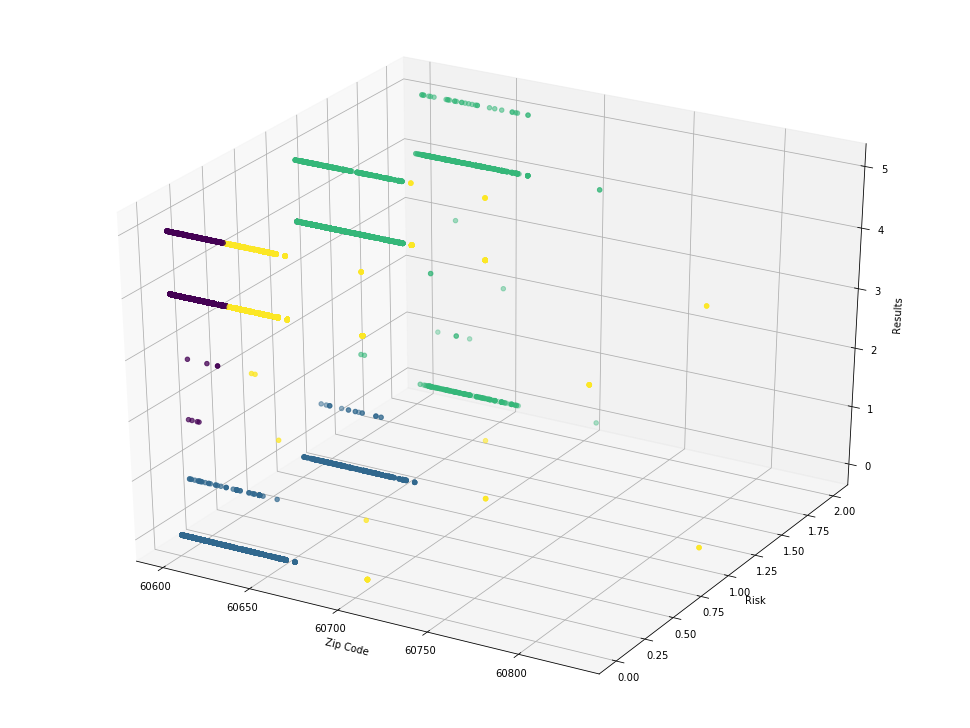

In [138]:
# First, the 4-clustered version of the data
graphplot4 = plt.figure(figsize=(17, 13))
display = graphplot4.add_subplot(111, projection='3d')

x_axis = np.array(my_data_matrix[:, 2]).flatten()
y_axis = np.array(my_data_matrix[:, 0]).flatten()
z_axis = np.array(my_data_matrix[:, 1]).flatten()
    
display.scatter(x_axis, y_axis, z_axis, c=k_means_data_fourcluster, marker='o')
display.set_xlabel('Zip Code')
display.set_ylabel('Risk')
display.set_zlabel('Results')

plt.show()

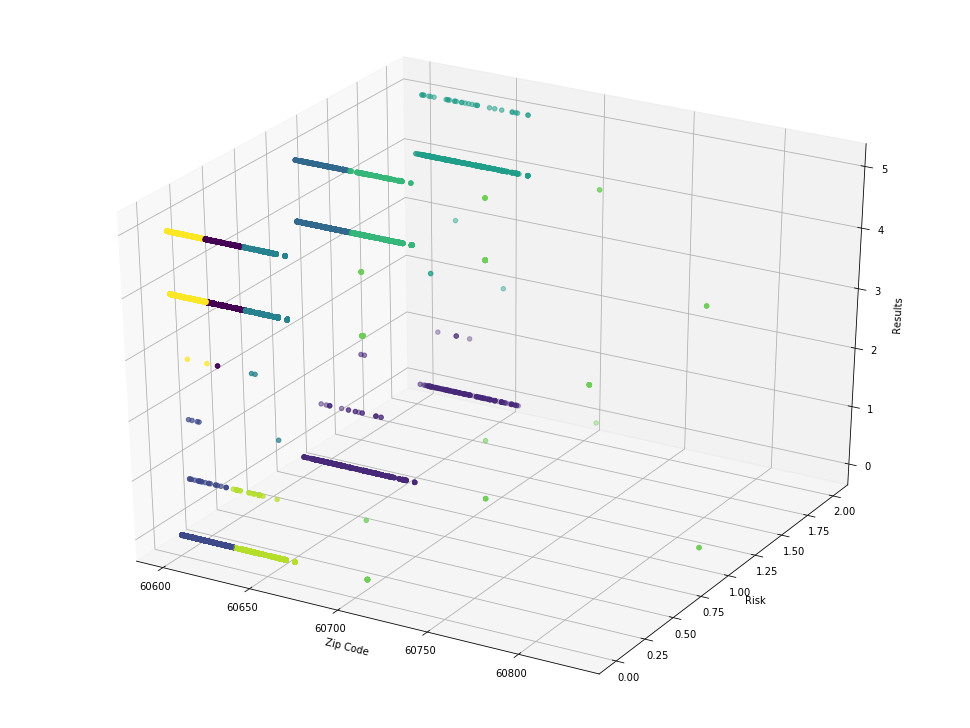

In [139]:
# Next, the 10-clustered version of the data
graphplot5 = plt.figure(figsize=(17, 13))
display = graphplot5.add_subplot(111, projection='3d')

x_axis = np.array(my_data_matrix[:, 2]).flatten()
y_axis = np.array(my_data_matrix[:, 0]).flatten()
z_axis = np.array(my_data_matrix[:, 1]).flatten()
    
display.scatter(x_axis, y_axis, z_axis, c=k_means_data_tencluster, marker='o')
display.set_xlabel('Zip Code')
display.set_ylabel('Risk')
display.set_zlabel('Results')

plt.show()

## Requirement #8: What will be the best value(s) for K to use in the K-MEANS algorithm to cluster the data into K clusters with respect to the following Features: Results and Risk? Explain your answer for the value of K based on your experimental results.

In [140]:
f4 = my_data['Risk'].values
f5 = my_data['Results'].values

my_data_2D_matrix = np.matrix(zip(f4, f5))

In [141]:
my_data_2D_matrix

matrix([[0, 4],
        [0, 4],
        [0, 4],
        ..., 
        [1, 0],
        [0, 4],
        [0, 4]])

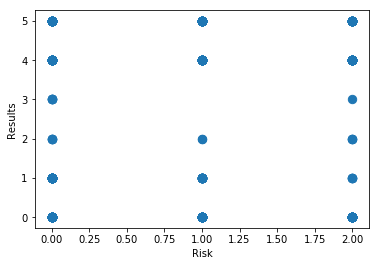

In [142]:
# This matrix when visualized looks like this:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], s=70, cmap='viridis');

In [143]:
# Next, we run the KMeans algorithm on the new feature matrices, 
# for cluster k-values of 2 to 10; visualizing the results of each
# with a scatter plot

In [144]:
# First with 2 KMeans clusters
k_means_2D_data_2cluster = KMeans(2, random_state=0).fit_predict(my_data_2D_matrix)

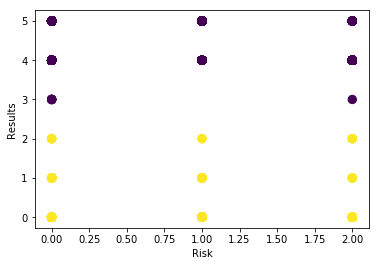

In [145]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_2cluster, s=70, cmap='viridis');

In [146]:
# Next, with 3 KMeans clusters
k_means_2D_data_3cluster = KMeans(3, random_state=0).fit_predict(my_data_2D_matrix)

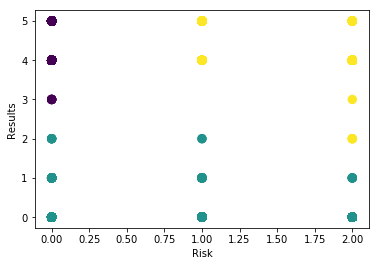

In [147]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_3cluster, s=70, cmap='viridis');

In [148]:
# Next, with 4 KMeans clusters
k_means_2D_data_4cluster = KMeans(4, random_state=0).fit_predict(my_data_2D_matrix)

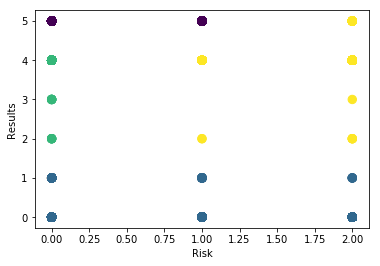

In [149]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_4cluster, s=70, cmap='viridis');

In [150]:
# And, with 5 KMeans clusters
k_means_2D_data_5cluster = KMeans(5, random_state=0).fit_predict(my_data_2D_matrix)

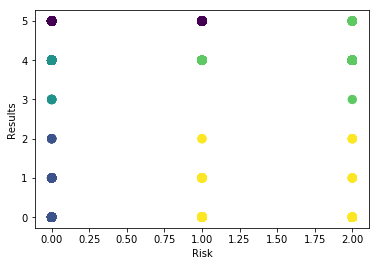

In [151]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_5cluster, s=70, cmap='viridis');

In [152]:
# And, with 6 KMeans clusters
k_means_2D_data_6cluster = KMeans(6, random_state=0).fit_predict(my_data_2D_matrix)

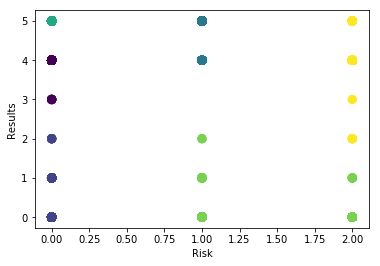

In [153]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_6cluster, s=70, cmap='viridis');

In [154]:
# And, with 7 KMeans clusters
k_means_2D_data_7cluster = KMeans(7, random_state=0).fit_predict(my_data_2D_matrix)

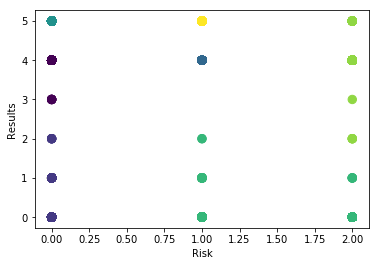

In [155]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_7cluster, s=70, cmap='viridis');

In [156]:
# And, with 8 KMeans clusters
k_means_2D_data_8cluster = KMeans(8, random_state=0).fit_predict(my_data_2D_matrix)

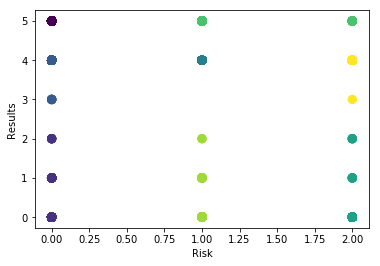

In [157]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_8cluster, s=70, cmap='viridis');

In [158]:
# And, with 9 KMeans clusters
k_means_2D_data_9cluster = KMeans(9, random_state=0).fit_predict(my_data_2D_matrix)

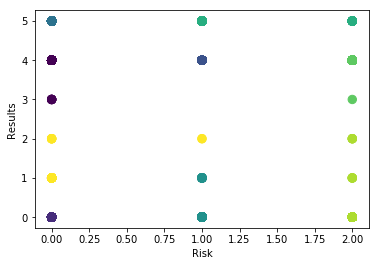

In [159]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_9cluster, s=70, cmap='viridis');

In [160]:
# And, with 10 KMeans clusters
k_means_2D_data_10cluster = KMeans(10, random_state=0).fit_predict(my_data_2D_matrix)

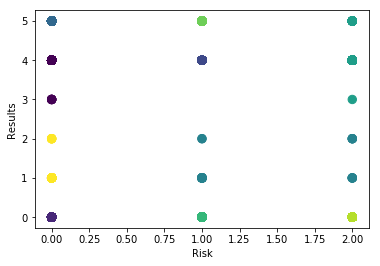

In [161]:
plt.xlabel('Risk')
plt.ylabel('Results')
plt.scatter(my_data_2D_matrix[:, 0], my_data_2D_matrix[:, 1], c=k_means_2D_data_10cluster, s=70, cmap='viridis');